# Zoomcamp MLOps Course Cohort 2024 Week 05 Homework
*Version:* `1.2` *(Jupytext, time measurements, logger, param notebook execution, fixes)*

<a name="ToC"></a>
# Table of Content

- [Notebook Description](#0)
- [General Settings](#1)
    - [Paths](#1-1)
    - [Notebook Functionality and Appearance](#1-2)
    - [External Libraries](#1-3)
    - [Internal Code](#1-4)
    - [Constants](#1-5)   
- [Analysis](#2)   
    - [Data Reading](#2-1)   
    - [Questions](#2-2)
        - [Q1 Refactoring](#2-2-1)     
        - [Q2 Installing pytest](#2-2-2)
        - [Q3 Writing first unit test](#2-2-3)
        - [Q4 Mocking S3 with Localstack](#2-2-4)    
        - [Q5 Creating test data](#2-2-5)
        - [Q6 Finish the integration test](#2-2-6)
- [Final Timestamp](#3)  

<a name="0"></a>
# Notebook Description
[ToC](#ToC) 

> *Please put your comments about the notebook functionality here.*  

<a name="1"></a>
# GENERAL SETTINGS
[ToC](#ToC)  
General settings for the notebook (paths, python libraries, own code, notebook constants). 

> *NOTE: All imports and constants for the notebook settings shoud be here. Nothing should be imported in the analysis section.*

<a name="1-1"></a>
### Paths
[ToC](#ToC)  

Adding paths that are necessary to import code from within the repository.

In [1]:
import sys
import os
sys.path+=[os.path.join(os.getcwd(), ".."), os.path.join(os.getcwd(), "../..")] # one and two up

<a name="1-2"></a>
### Notebook Functionality and Appearance
[ToC](#ToC)  
Necessary libraries for notebook functionality:
- A button for hiding/showing the code. By default it is deactivated and can be activated by setting CREATE_BUTTON constant to True. 
> **NOTE: This way, using the function, the button works only in active notebook. If the functionality needs to be preserved in html export, then the code has to be incluced directly into notebook.**
- Set notebook width to 100%.
- Notebook data frame setting for better visibility.
- Initial timestamp setting and logging the start of the execution.

#### Overall Setting Specification

In [2]:
LOGGER_CONFIG_NAME = "logger_file_limit_console"
ADDAPT_WIDTH = False

#### Overall Behaviour Setting

In [3]:
try:
    from src.utils.notebook_support_functions import create_button, get_notebook_name
    NOTEBOOK_NAME = get_notebook_name()
    SUPPORT_FUNCTIONS_READ = True
except:
    NOTEBOOK_NAME = "NO_NAME"
    SUPPORT_FUNCTIONS_READ = False  

In [4]:
from src.utils.logger import Logger
from src.utils.envs import Envs
from src.utils.config import Config
from pandas import options
from IPython.display import display, HTML

In [5]:
options.display.max_rows = 500
options.display.max_columns = 500
envs = Envs()
envs.set_logger(LOGGER_CONFIG_NAME)
Logger().start_timer(f"NOTEBOOK; Notebook name: {NOTEBOOK_NAME}")
if ADDAPT_WIDTH:
    display(HTML("<style>.container { width:100% !important; }</style>")) # notebook width

2024-06-28 17:48:48,981 - file_limit_console - INFO - Logger was created on WS-3000 in branche 006_do_week_06_hw.
2024-06-28 17:48:48,983 - file_limit_console - INFO - Process: NOTEBOOK; Notebook name: W06_HW.ipynb; Timer started;


In [6]:
# create_button()

<a name="1-3"></a>
### External Libraries
[ToC](#ToC)  

In [7]:
from datetime import datetime

from IPython.display import display, HTML, Image

<a name="1-4"></a>
### Internal Code
[ToC](#ToC)  
Code, libraries, classes, functions from within the repository.

In [8]:
from src.utils.date_time_functions import create_datetime_id

<a name="1-5"></a>
### Constants
[ToC](#ToC)  
Constants for the notebook.

> *NOTE: Please use all letters upper.*

#### General Constants
[ToC](#ToC)  

In [9]:
# from src.global_constants import *  # Remember to import only the constants in use
N_ROWS_TO_DISPLAY = 2
FIGURE_SIZE_SETTING = {"autosize": False, "width": 2200, "height": 750}
DATA_PROCESSING_CONFIG_NAME = "data_processing_basic"

#### Constants for Setting Automatic Run
[ToC](#ToC)  

In [10]:
# MANDATORY FOR CONFIG DEFINITION AND NOTEBOOK AND ITS OUTPUTS IDENTIFICATION #########################################
PYTHON_CONFIG_NAME = "python_local"
ID = create_datetime_id(now=datetime.now(), add_micro=False)
# (END) MANDATORY FOR CONFIG DEFINITION AND NOTEBOOK AND ITS OUTPUTS IDENTIFICATION ###################################

#### Python Config Initialisation
[ToC](#ToC)  

In [11]:
envs.set_config(PYTHON_CONFIG_NAME)

#### Notebook Specific Constants
[ToC](#ToC)  

<a name="2"></a>
# ANALYSIS
[ToC](#ToC)  

<a name="2-1"></a>
## Chapter
[ToC](#ToC)  

<a name="2-1"></a>
## Data Reading
[ToC](#ToC)  

<a name="2-2"></a>
## Questions
[ToC](#ToC)  

<a name="2-2-1"></a>
### Q1 Refactoring
[ToC](#ToC)  

Before we can start covering our code with tests, we need to refactor it. We'll start by getting rid of all the global variables.

Let's create a function main with two parameters: year and month.
Move all the code (except read_data) inside main
Make categorical a parameter for read_data and pass it inside main
Now we need to create the "main" block from which we'll invoke the main function. How does the if statement that we use for this looks like?

Hint: after refactoring, check that the code still works. Just run it e.g. for March 2023 and see if it finishes successfully.

To make it easier to run it, you can write results to your local filesystem. E.g. here:

~~~
output_file = f'taxi_type=yellow_year={year:04d}_month={month:02d}.parquet'
~~~

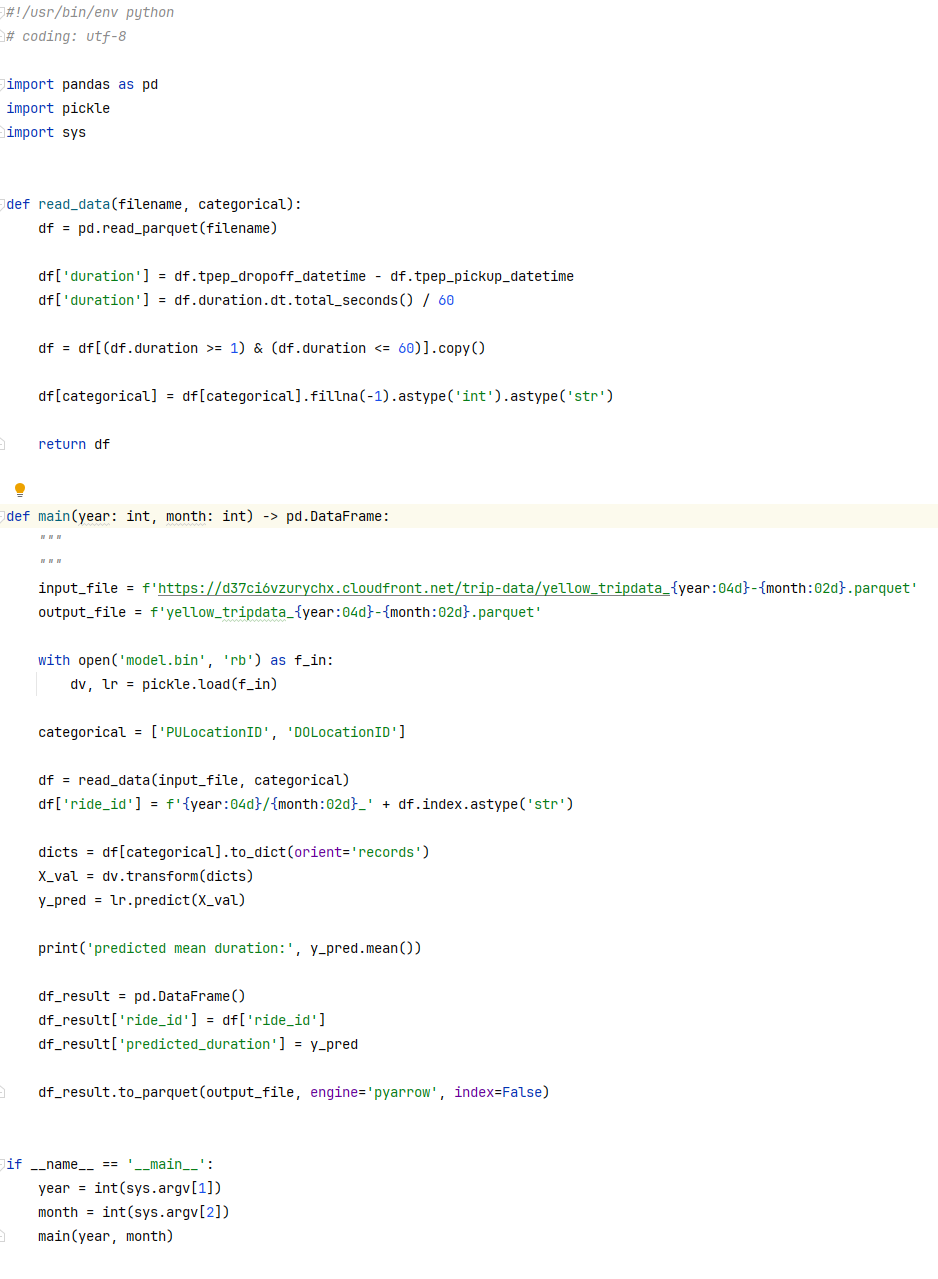

In [12]:
display(Image(filename="W6_Q01.png"))

In [13]:
answer = "The statement is: if __name__ == '__main__':"
display(HTML(f"<p style='font-weight:bold; background-color:black; color:white; font-size:20px; padding:10px;'>Answer: {answer}</p>"))

<a name="2-2-2"></a>
### Q2 Installing pytest
[ToC](#ToC)  

Now we need to install pytest:
~~~
pipenv install --dev pytest
~~~
Next, create a folder tests and create two files. One will be the file with tests. We can name it test_batch.py.

What should be the other file?

Hint: to be able to test batch.py, we need to be able to import it. Without this other file, we won't be able to do it.

In [14]:
answer = "A file __init__.py has to be created there."
display(HTML(f"<p style='font-weight:bold; background-color:black; color:white; font-size:20px; padding:10px;'>Answer: {answer}</p>"))

<a name="2-2-3"></a>
### Q3 Writing first unit test
[ToC](#ToC)  

Now let's cover our code with unit tests.

We'll start with the pre-processing logic inside read_data.

It's difficult to test right now because first reads the file and then performs some transformations. We need to split this code into two parts: reading (I/O) and transformation.

So let's create a function prepare_data that takes in a dataframe (and some other parameters too) and applies some transformation to it.

(That's basically the entire read_data function after reading the parquet file)

Now create a test and use this as input:
~~~
data = [
    (None, None, dt(1, 1), dt(1, 10)),
    (1, 1, dt(1, 2), dt(1, 10)),
    (1, None, dt(1, 2, 0), dt(1, 2, 59)),
    (3, 4, dt(1, 2, 0), dt(2, 2, 1)),      
]

columns = ['PULocationID', 'DOLocationID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime']
df = pd.DataFrame(data, columns=columns)
~~~
Where dt is a helper function:
~~~
from datetime import datetime

def dt(hour, minute, second=0):
    return datetime(2023, 1, 1, hour, minute, second)
~~~
Define the expected output and use the assert to make sure that the actual dataframe matches the expected one.

Tip: When you compare two Pandas DataFrames, the result is also a DataFrame. The same is true for Pandas Series. Also, a DataFrame could be turned into a list of dictionaries.

How many rows should be there in the expected dataframe?

1    
2    
3  
4  

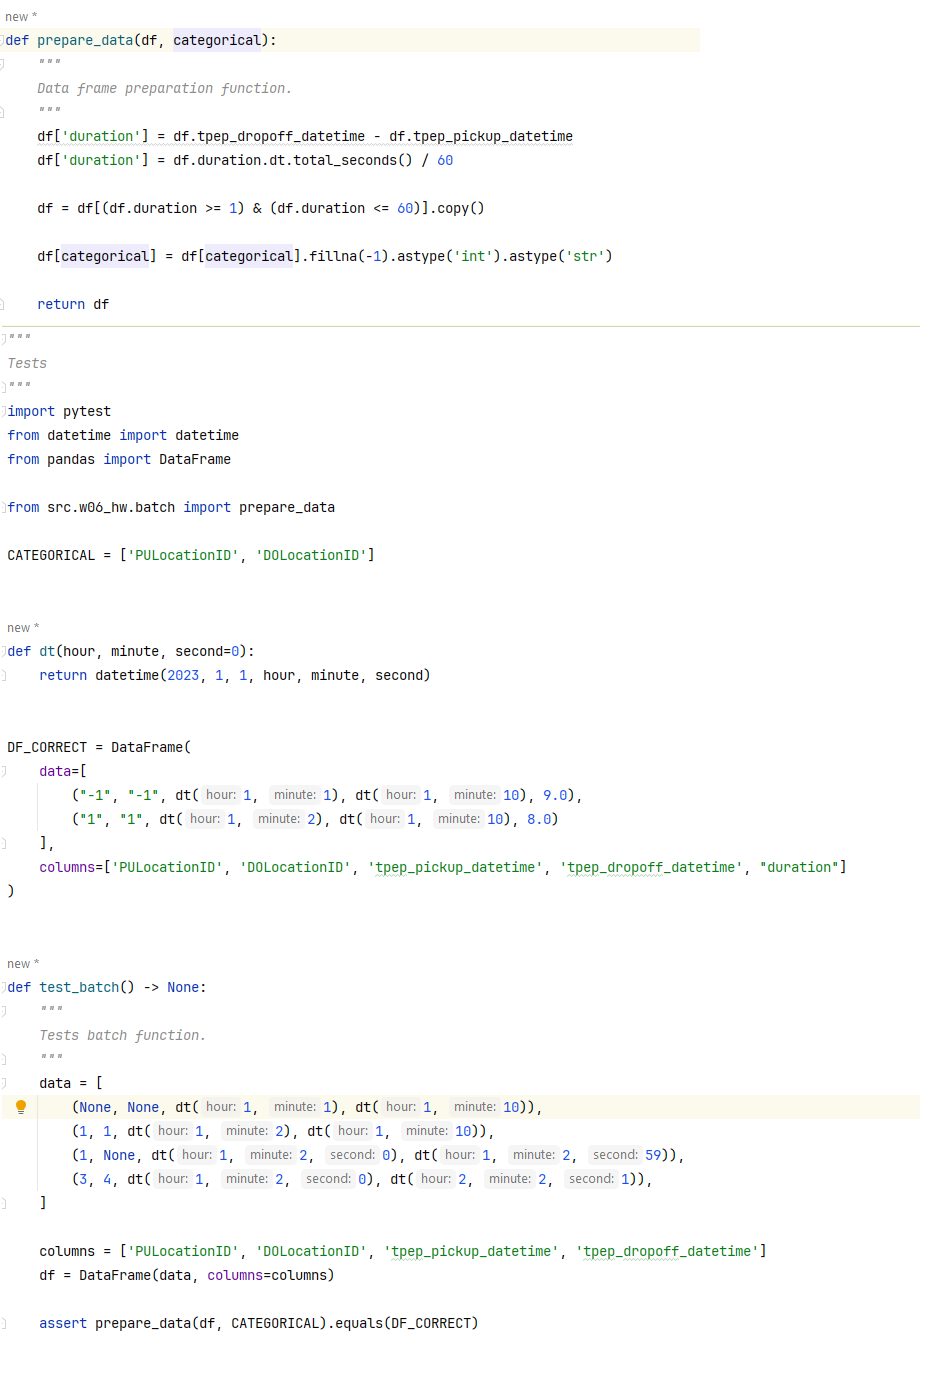

In [46]:
display(Image(filename="W6_Q03.png"))

> **THE TEST FILE IS IN \tests\tests_w06_hw\test_batch.py**

In [47]:
answer = f"There are 2 rows in the data frame."
display(HTML(f"<p style='font-weight:bold; background-color:black; color:white; font-size:20px; padding:10px;'>Answer: {answer}</p>"))

<a name="2-2-4"></a>
### Q4 Mocking S3 with Localstack
[ToC](#ToC)  

Now let's prepare for an integration test. In our script, we write data to S3. So we'll use Localstack to mimic S3.

First, let's run Localstack with Docker compose. Let's create a docker-compose.yaml file with just one service: localstack. Inside localstack, we're only interested in running S3.

Start the service and test it by creating a bucket where we'll keep the output. Let's call it "nyc-duration".

With AWS CLI, this is how we create a bucket:

aws s3 mb s3://nyc-duration
Then we need to check that the bucket was successfully created. With AWS, this is how we typically do it:

aws s3 ls
In both cases we should adjust commands for localstack. What option do we need to use for such purposes?

--backend-store-uri  
--profile  
--endpoint-url  
--version  

In [ ]:
answer = "The config file should be placed in project_folder/config"
display(HTML(f"<p style='font-weight:bold; background-color:black; color:white; font-size:20px; padding:10px;'>Answer: {answer}</p>"))

<a name="2-2-5"></a>
### Q5  Creating test data
[ToC](#ToC)  

Now let's create integration_test.py

We'll use the dataframe we created in Q3 (the dataframe for the unit test) and save it to S3. You don't need to do anything else: just create a dataframe and save it.

We will pretend that this is data for January 2023.

Run the integration_test.py script. After that, use AWS CLI to verify that the file was created.

Use this snipped for saving the file:

df_input.to_parquet(
    input_file,
    engine='pyarrow',
    compression=None,
    index=False,
    storage_options=options
)
What's the size of the file?

3620  
23620  
43620  
63620  
Note: it's important to use the code from the snippet for saving the file. Otherwise the size may be different depending on the OS, engine and compression. Even if you use this exact snippet, the size of your dataframe may still be a bit off. Just select the closest option.

<a name="2-2-6"></a>
### Q6 Finish the integration test
[ToC](#ToC)  

We can read from our localstack s3, but we also need to write to it.

Create a function save_data which works similarly to read_data, but we use it for saving a dataframe.

Let's run the batch.py script for January 2023 (the fake data we created in Q5).

We can do that from our integration test in Python: we can use os.system for doing that (there are other options too).

Now it saves the result to localstack.

The only thing we need to do now is to read this data and verify the result is correct.

What's the sum of predicted durations for the test dataframe?

13.08  
36.28  
69.28  
81.08  

<a name="3"></a>
# Final Timestamp
[ToC](#ToC)  

In [ ]:
Logger().end_timer()